In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats

In [44]:
fn_out = "output/wikipedia_metrics.csv"
df_out = pd.read_csv(fn_out)

In [40]:
fn = "input/wikipedia_edits.csv.zip"
df = pd.read_csv(fn)

In [36]:
len(df)

789343

In [5]:
df_edits = df.groupby("title")["revid"].agg([len])

In [6]:
df_edits.head()

,len
title,
50_Cent,13066
Adele,6725
Angelina_Jolie,7336
Backstreet_Boys,10270
Ben_Affleck,9263


In [7]:
df_edits.columns = ["edits"]
df_edits.head()

,edits
title,
50_Cent,13066
Adele,6725
Angelina_Jolie,7336
Backstreet_Boys,10270
Ben_Affleck,9263


In [8]:
df_edits.sort_values(by="edits", ascending=False).head(5)

,edits
title,
Roger_Federer,24641
Britney_Spears,24640
The_Beatles,23342
Beyonce,20811
Eminem,19899


In [10]:
df_size = df.groupby("title")["size"].agg([np.sum])
df_size.columns = ["size"]
df_size.head()

,size
title,
50_Cent,518204129
Adele,456912673
Angelina_Jolie,531496219
Backstreet_Boys,412497115
Ben_Affleck,906521569


In [13]:
df_size.sort_values(by="size", ascending=False).head(5)

,size
title,
Roger_Federer,2545161596
Cristiano_Ronaldo,2351953387
Paul_McCartney,2059061790
The_Beatles,2055056731
Lionel_Messi,1977764924


In [16]:
df_users = df.groupby(["title"])["user"].nunique()
df_users = pd.DataFrame(df_users)
df_users.columns = ["users"]

In [17]:
df_users.head()

,users
title,
50_Cent,4557
Adele,2672
Angelina_Jolie,2902
Backstreet_Boys,4050
Ben_Affleck,3655


In [18]:
df_users.sort_values(by="users", ascending=False).head(5)

,users
title,
Roger_Federer,8019
Eminem,7247
The_Beatles,6971
Britney_Spears,6896
Dwayne_Johnson,6727


In [19]:
df_edits.reset_index(inplace=True)
df_size.reset_index(inplace=True)
df_users.reset_index(inplace=True)

In [20]:
df_edits.head()

,title,edits
0,50_Cent,13066
1,Adele,6725
2,Angelina_Jolie,7336
3,Backstreet_Boys,10270
4,Ben_Affleck,9263


In [22]:
df_out = pd.merge(df_edits, df_size)
df_out = pd.merge(df_out, df_users)
df_out.head()

,title,edits,size,users
0,50_Cent,13066,518204129,4557
1,Adele,6725,456912673,2672
2,Angelina_Jolie,7336,531496219,2902
3,Backstreet_Boys,10270,412497115,4050
4,Ben_Affleck,9263,906521569,3655


In [23]:
df_out.to_csv(fn_out, index=False)

In [45]:
x = df_out["users"]
y = df_out["edits"]

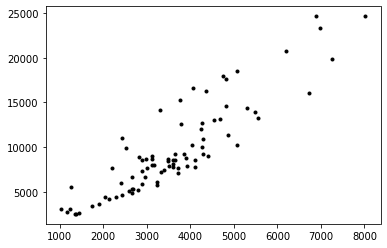

In [50]:
plt.plot(x, y, color = 'black', marker = '.', linestyle = '')

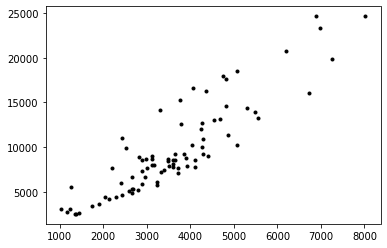

In [51]:
plt.plot(x, y, c = 'k', marker = '.', ls='')

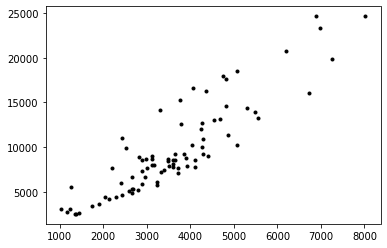

In [52]:
plt.plot(x, y, 'k.')

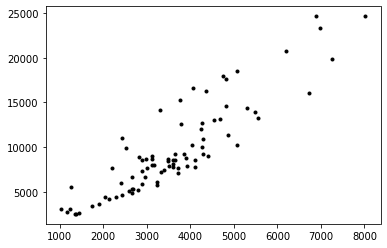

In [54]:
plt.plot(x,y,'k.')

In [56]:
mean_ratio = np.mean(y/x)
mean_ratio

2.609397656944558

In [57]:
xx = np.linspace(800, 8400, 1000)
yy = mean_ratio * xx

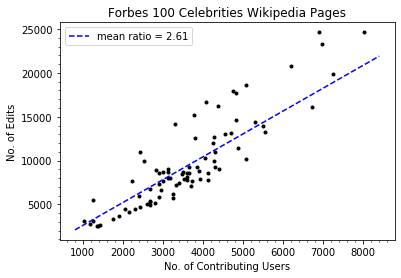

In [59]:
plt.plot(x,y,'k.')
plt.plot(xx, yy, 'b--', label = "mean ratio = %.2f" % mean_ratio)

plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities Wikipedia Pages")
plt.legend(loc = "upper left", numpoints = 1)

In [60]:
x_mean = np.mean(x)
x_mean

3604.2073170731705

In [63]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x-x_mean, y)

In [64]:
slope, intercept

(3.17979447002623, 9626.134146341463)

In [65]:
r_value, p_value, std_err

(0.8905379922596317, 4.2851570848775055e-29, 0.18160425239314257)

In [67]:
xx_fit = xx - x_mean
yy_fit = slope * xx_fit + intercept

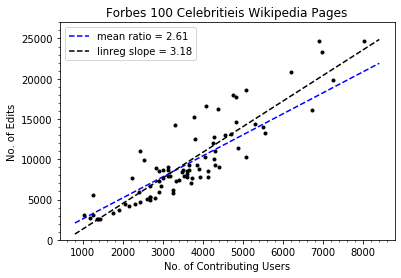

In [68]:
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b--', label = "mean ratio = %.2f" % mean_ratio)
plt.plot(xx, yy_fit, 'k--', label = "linreg slope = %.2f" % slope)

plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebritieis Wikipedia Pages")
plt.legend(loc = "upper left", numpoints = 1)
plt.ylim((0, 27000))

plt.savefig("fig/fig_wikipedia_users_vs_no_of_edits.png")